In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xg
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
plt.rcParams["font.family"] = "serif"

In [2]:
dataset = pd.read_csv('UCS.csv')

In [3]:
print(dataset)

    Set  Temp  P Wave        Dt  ...      σm1      σm2  Avg (σm1, σm2)  FR
0     I    25    3866  0.000000  ...  0.00000  0.00000        0.000000 NaN
1     I    25    3895  0.000000  ...  0.00000  0.00000        0.000000 NaN
2     I    25    3852  0.000000  ...  0.00000  0.00000        0.000000 NaN
3     I   250    2768  0.487365  ...  0.00000  0.00000        0.000000 NaN
4     I   250    2768  0.494970  ...  0.00000  0.00000        0.000000 NaN
..  ...   ...     ...       ...  ...      ...      ...             ...  ..
85  III  1000    1393  0.863690  ...  0.05746  1.42134        0.739400 NaN
86  III  1000    1388  0.864667  ...  0.05746  1.42134        0.739400 NaN
87  III  1000    1397  0.863918  ...  0.03648  1.81851        0.927495 NaN
88  III  1000    1388  0.864667  ...  0.03648  1.81851        0.927495 NaN
89  III  1000    1378  0.866610  ...  0.03648  1.81851        0.927495 NaN

[90 rows x 11 columns]


In [4]:
X = dataset.iloc[ : , 0:7].values
y = dataset.iloc[ : , -2].values

In [5]:
print(y)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.468535
 0.468535 0.475375 0.475375 0.264705 0.264705 0.111265 0.111265 0.29583
 0.29583  0.31441  0.31441  0.114    0.114    0.14866  0.14866  0.19437
 0.19437  0.401275 0.401275 0.31122  0.31122  0.358415 0.358415 0.164615
 0.164615 0.173395 0.173395 0.6767   0.6767   3.50124  3.50124  3.50124
 1.76562  1.76562  1.76562  3.925845 3.925845 3.925845 1.73518  1.73518
 1.73518  1.632015 1.632015 1.632015 1.054605 1.054605 1.054605 1.834705
 1.834705 1.834705 1.82271  1.82271  1.82271  2.027705 2.027705 2.027705
 1.31304  1.31304  1.31304  2.23438  2.23438  2.23438  1.18559  1.18559
 1.18559  0.603625 0.603625 0.603625 0.7394   0.7394   0.7394   0.927495
 0.927495 0.927495]


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 5] = le.fit_transform(X[:, 5])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [9]:
xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

[08:55:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [10]:
y_train_pred2 = xgb_model2.predict(X_train)
y_pred2 = xgb_model2.predict(X_test)

In [11]:
print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

Train r2 score:  0.9496606553232269
Test r2 score:  0.8360741680145893
Train RMSE: 0.1991
Test RMSE: 0.5019


In [12]:
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[0.06986746 0.        ]
 [0.03645375 0.        ]
 [3.25823379 3.925845  ]
 [0.27759254 0.173395  ]
 [1.77261257 1.82271   ]
 [0.24145216 0.14866   ]
 [1.85597432 3.50124   ]
 [0.30648929 0.6767    ]
 [1.54372108 1.18559   ]
 [0.85618454 0.927495  ]
 [0.00622982 0.        ]
 [0.22662419 0.31441   ]
 [0.22814086 0.401275  ]
 [1.64127183 1.834705  ]]


In [13]:
#plt.plot(y_test, color = 'red', label = 'Real data')
#plt.plot(y_pred2, color = 'blue', label = 'Predicted data')
#plt.xlabel('Serial number of data point in test set')
#plt.ylabel('Memory Stress (MPa)')
#plt.title('UCS Prediction')
#plt.legend()
#plt.show()

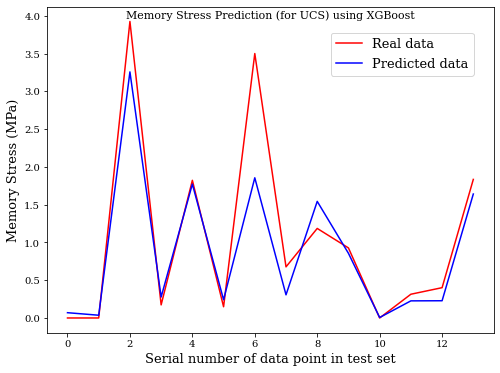

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred2, color = 'blue', label = 'Predicted data')
plt.xlabel('Serial number of data point in test set', fontsize=13)
plt.ylabel('Memory Stress (MPa)',fontsize=13)
plt.title('Memory Stress Prediction (for UCS) using XGBoost', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.savefig("UCS (XGBoost)",dpi=1500,bbox_inches = 'tight')
plt.show()